## [Data Science Course] Model Evaluation: assignment #9 - How to assess model's performance?

### MACHINE LEARNING MODEL AND PERFORMANCE

<img src="Images/0_IT9aLhgbOVDkMNKM.jpg" width="900" height="2000">
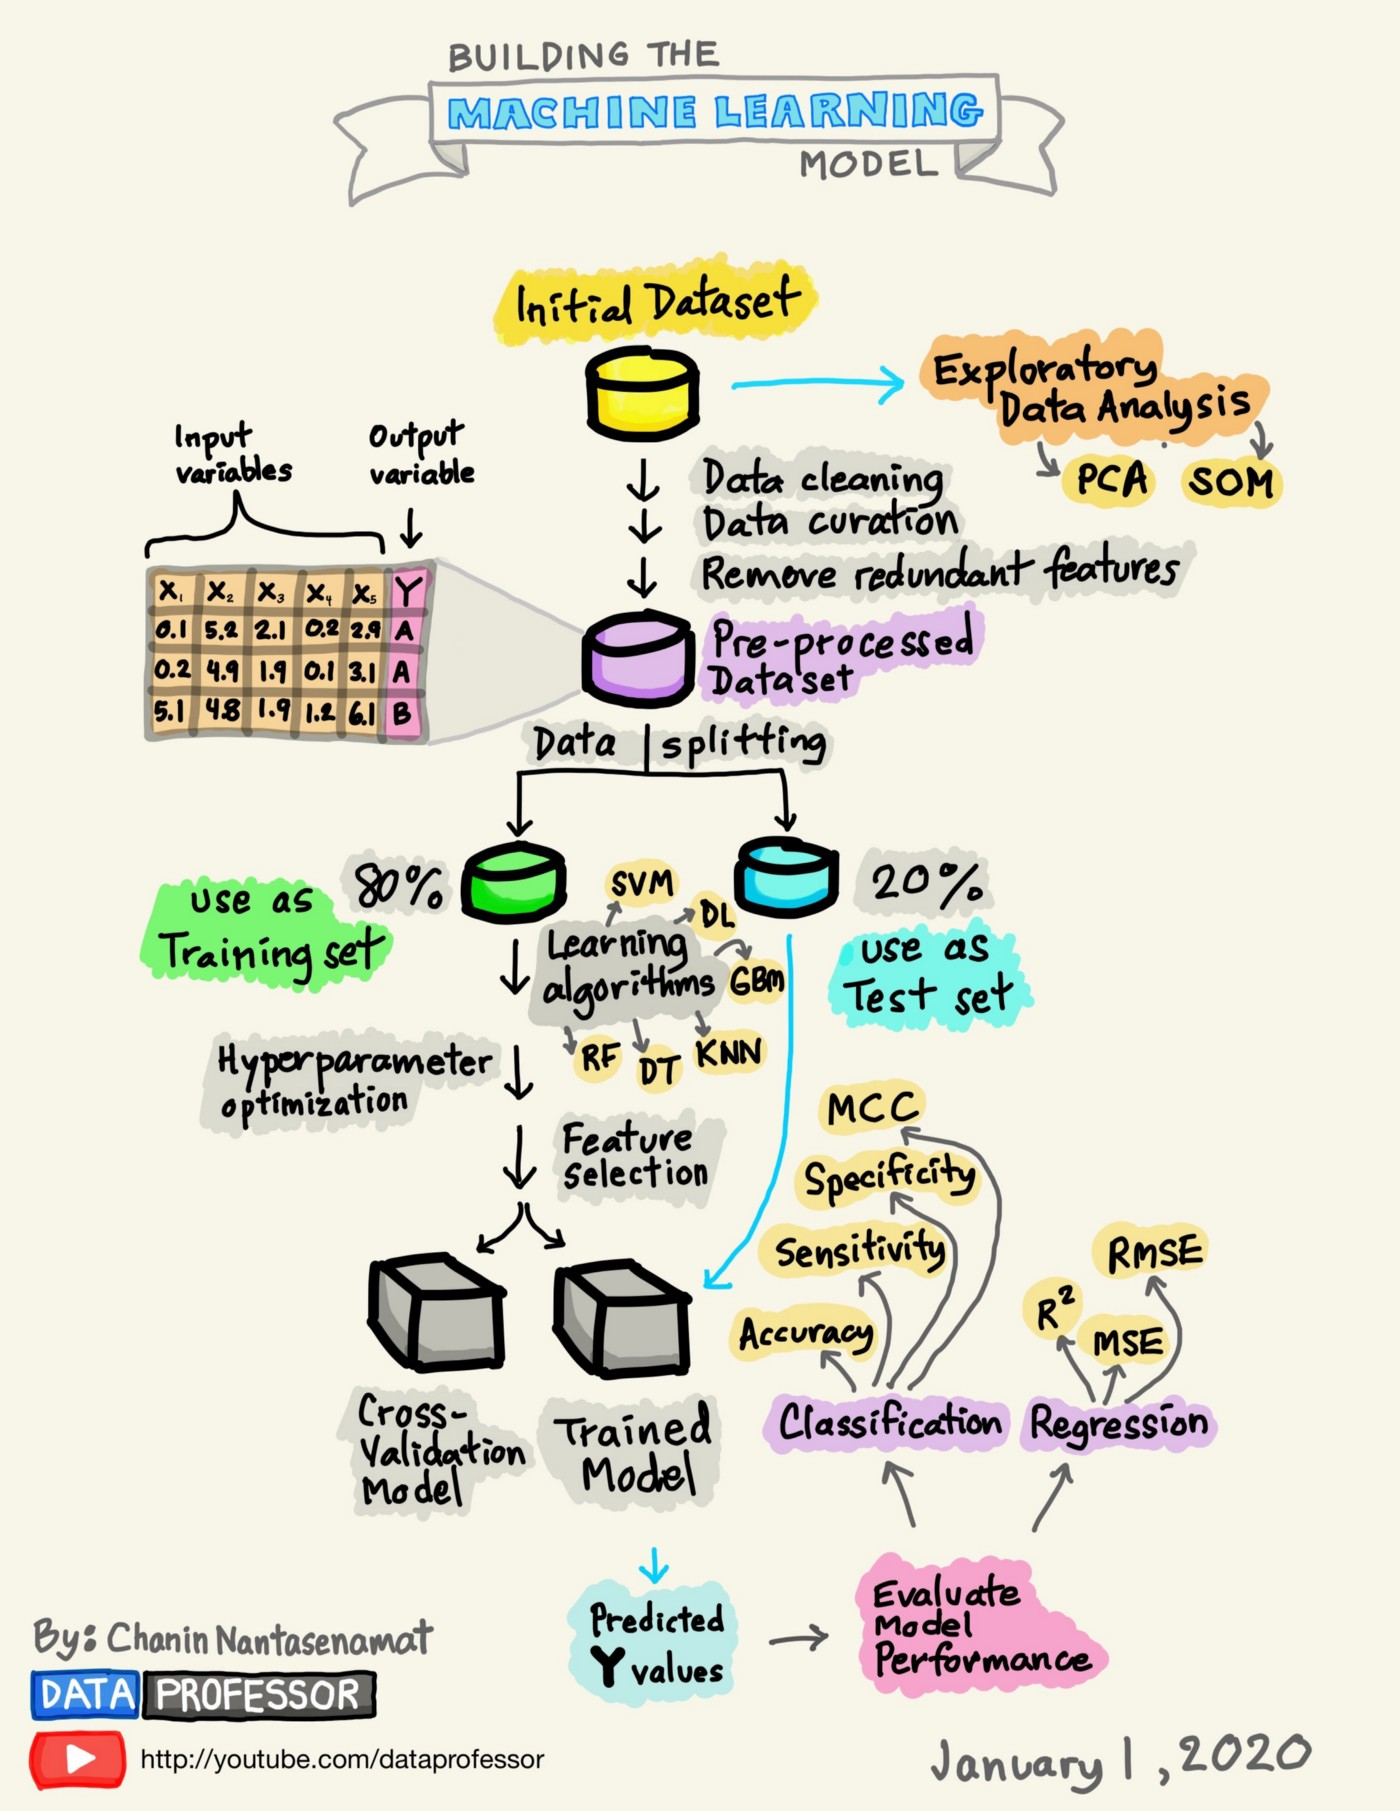

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.linear_model import LogisticRegression , LinearRegression 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , PowerTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

import apply_preprocessing_9 as apply_pp

from os import system
# On désigne le chemin vers l'exe de graphViz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


## STEP 1: DATASET

[Dataset description](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices?select=housing.csv)

In [2]:
#from sklearn.datasets import load_boston
#boston_dataset = load_boston()
Data = pd.read_csv('Dataset/BostonHousing.csv', sep =',')
Data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [3]:
Data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#Data celanning info

Data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
Data.dtypes.value_counts()

float64    11
int64       3
dtype: int64

In [6]:
#Data spliting 
train, test = train_test_split(Data, shuffle=True, test_size=0.2, random_state=50)
test.to_csv('Dataset/test.csv', header=True, index=False, sep=',')

In [7]:
Data.shape , train.shape, test.shape

((506, 14), (404, 14), (102, 14))

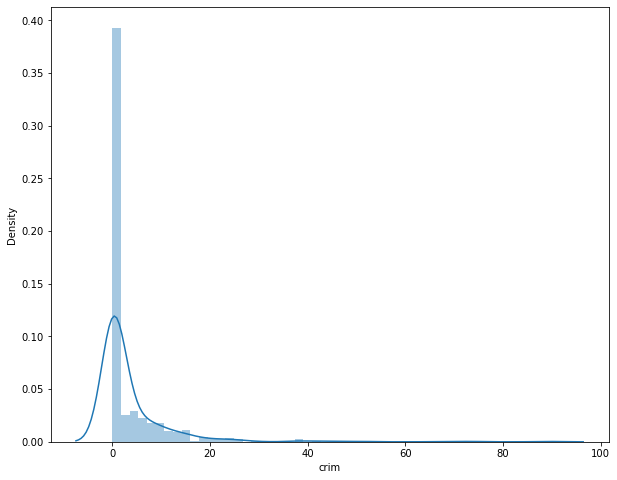

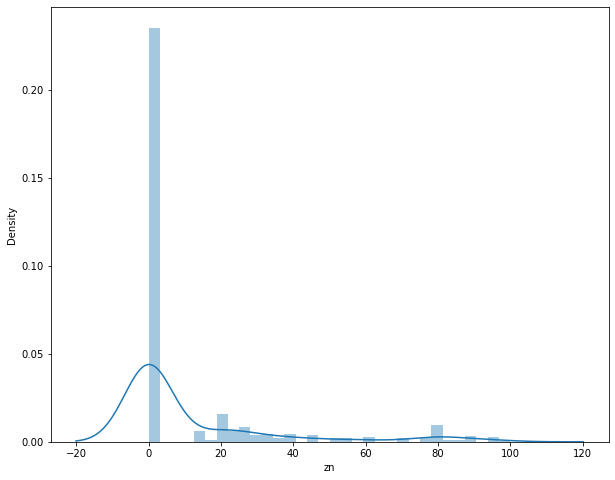

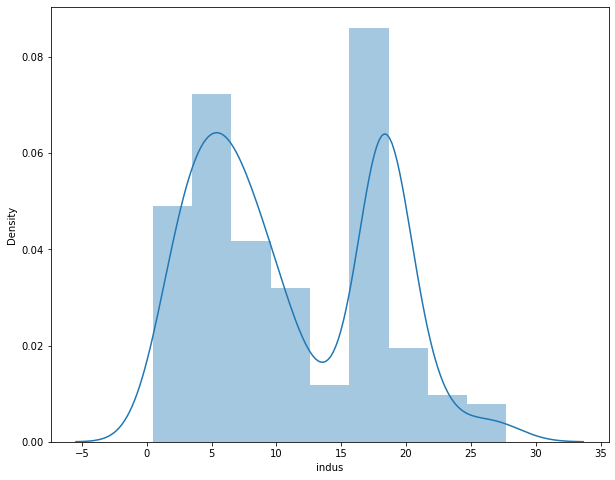

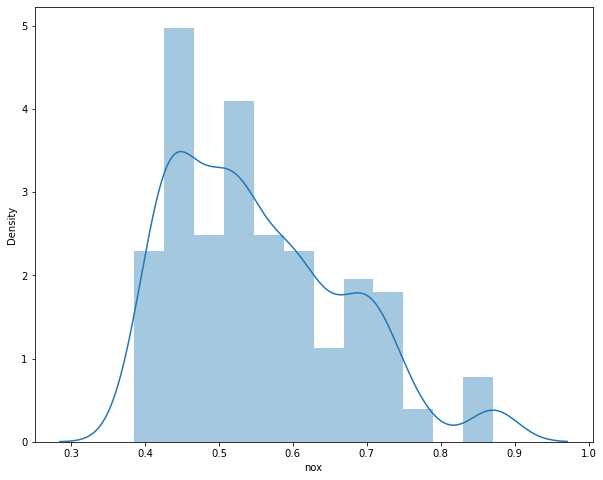

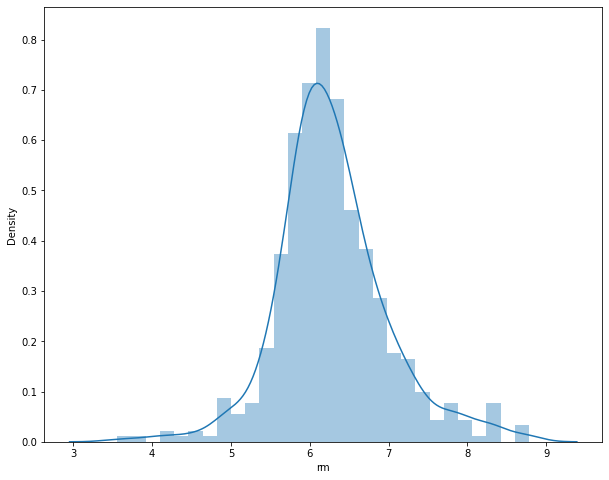

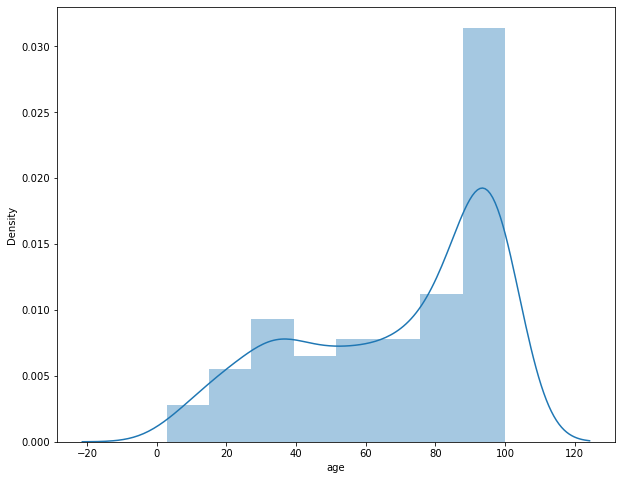

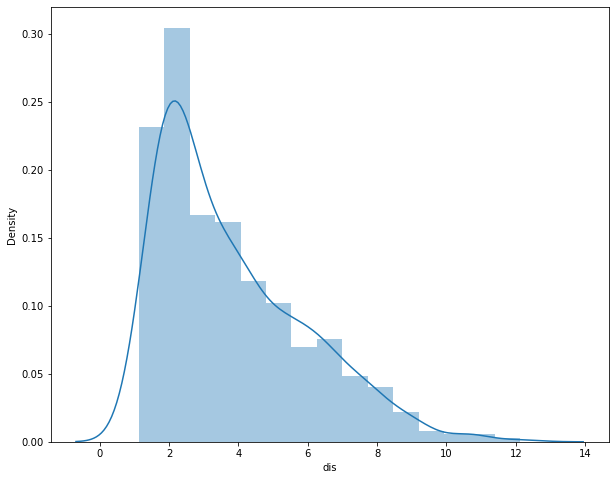

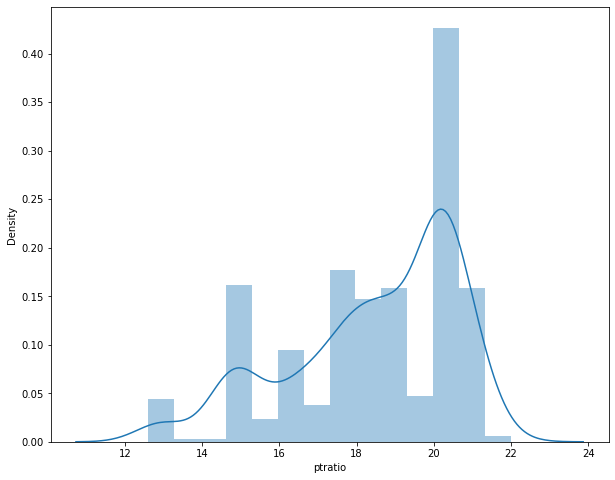

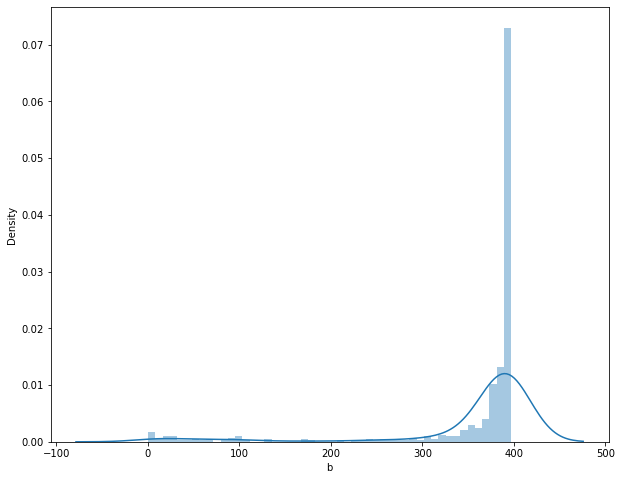

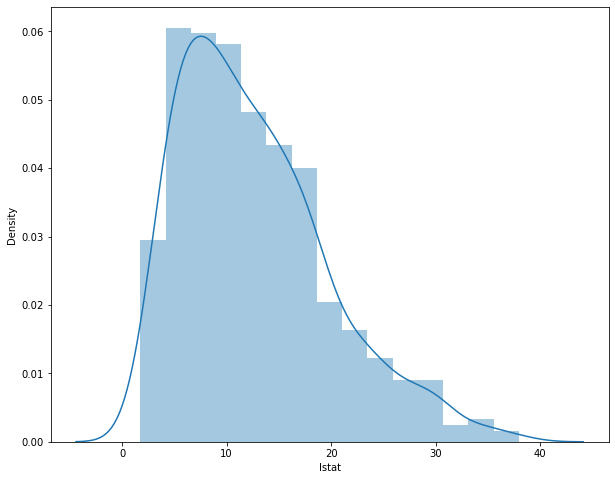

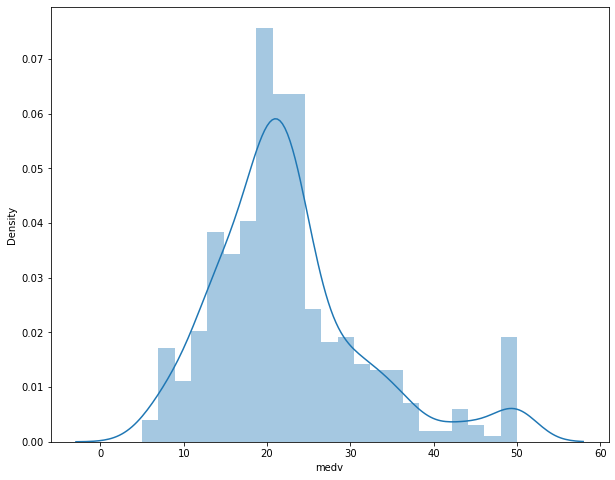

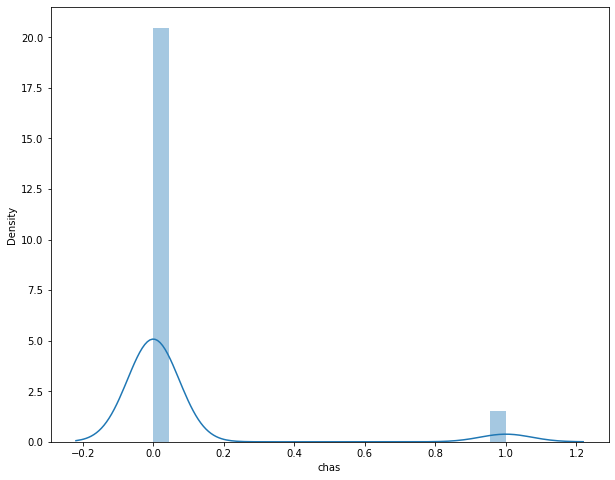

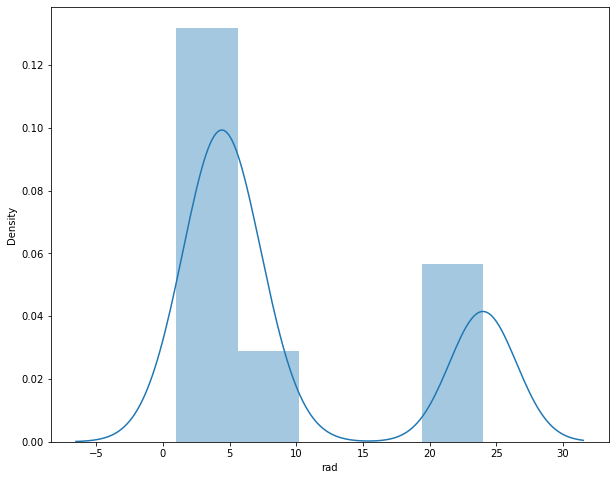

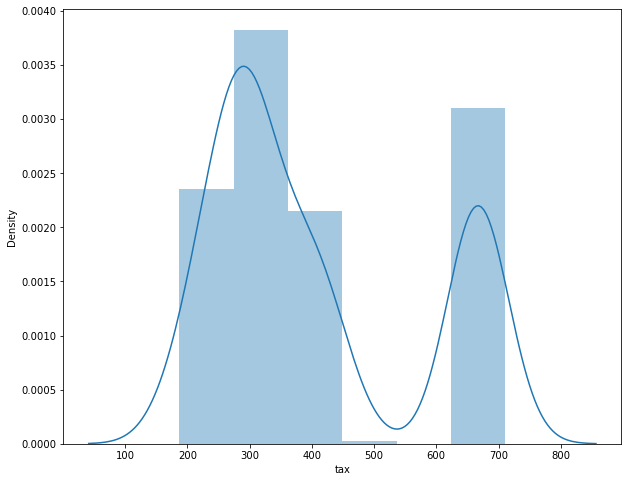

In [8]:
#Data Analisis

for col in Data.select_dtypes('float'):
    plt.figure(figsize=(10,8))
    sns.distplot(Data[col])
    
    
for col in Data.select_dtypes('int'):
    plt.figure(figsize=(10,8))
    sns.distplot(Data[col])

# STEP 2: Preprocessing

In [9]:
#Preprocessing
pp_X_train , pp_y_train  = apply_pp.apply_preprocessing(train,is_training=True)  # To retrieve our target medv

In [10]:
pp_X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
449,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97
253,0.36894,22.0,5.86,0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64


# STEP 3 : LEARNING ALGORITHMS

### DecisionTreeClassifier

In [11]:
#Decision tree classifier

modelTree = tree.DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=6 )
modelTree.fit(pp_X_train , pp_y_train)
accuracyTreeTrain = modelTree.score(pp_X_train,pp_y_train)
print('Accuracy DECISION TREE x_train : ', round(accuracyTreeTrain*100,2),'%')

Accuracy DECISION TREE x_train :  41.83 %


### LogisticRegression

In [12]:
# LogisticRegression

modelRl = LogisticRegression(random_state = 0, solver='newton-cg')
modelRl.fit(pp_X_train,pp_y_train)
accuracyRlTrain = modelRl.score(pp_X_train,pp_y_train)
print('Accuracy LOGIC REGRESSION x_train : ', round(accuracyRlTrain*100,2),'%')

Accuracy LOGIC REGRESSION x_train :  33.17 %


### LinearRegression

In [13]:
#LinearRegression

modelLinReg = LinearRegression()
modelLinReg.fit(pp_X_train,pp_y_train)
modelLinRegTrain = modelLinReg.score(pp_X_train,pp_y_train)
print('Accuracy LINEAR REGRESSION x_train : ', round(modelLinRegTrain*100,2),'%')

Accuracy LINEAR REGRESSION x_train :  75.1 %


### KNN

In [14]:
#KNN

modelkNN= KNeighborsClassifier(n_neighbors=2)
modelkNN.fit(pp_X_train,pp_y_train)
modelkNNTrain = modelkNN.score(pp_X_train,pp_y_train)
print('Accuracy KNN x_train : ', round(modelkNNTrain*100,2),'%')

Accuracy KNN x_train :  54.95 %


In [15]:
# Save/serialize the fitted model to local OS

with open('pickle/modelTree.pkl', 'wb') as output_file:
    pickle.dump(modelTree, output_file)

with open('pickle/modelRl.pkl', 'wb') as output_file:
    pickle.dump(modelRl, output_file)
    
with open('pickle/modelLinReg.pkl', 'wb') as output_file:
    pickle.dump(modelLinReg, output_file)

with open('pickle/modelkNN.pkl', 'wb') as output_file:
    pickle.dump(modelkNN, output_file)

# STEP 4: FEATURES SELECTION 

### SelectKBest

In [16]:
#Slect best features chi_square correlation test

chi2(pp_X_train, pp_y_train)

(array([4.57859114e+03, 5.94633073e+03, 8.21079404e+02, 3.24936274e+01,
        4.58777644e+00, 1.79230981e+01, 2.15811030e+03, 1.58056052e+02,
        1.20564332e+03, 1.25685351e+04, 3.96323431e+01, 3.14503612e+03,
        1.21474633e+03]),
 array([0.00000000e+000, 0.00000000e+000, 8.98425734e-146, 8.26002830e-001,
        1.00000000e+000, 9.99349952e-001, 0.00000000e+000, 1.18352071e-015,
        4.93085522e-226, 0.00000000e+000, 5.31417725e-001, 0.00000000e+000,
        6.02311692e-228]))

In [17]:
selector = SelectKBest(f_classif, k=2)
selector.fit(pp_X_train, pp_y_train)
selector.scores_

array([ 9.17620247,  3.96633389,  7.78590591,  0.82558185,  7.74352284,
       11.24818821,  7.26589855,  4.40870612,  5.29663402,  7.05661587,
        5.55739073,  4.18084531, 22.49673756])

In [19]:
#To see the best features 

np.array(pp_X_train.columns)[selector.get_support()]

array(['rm', 'lstat'], dtype=object)

In [20]:
#New features 
pp_X_train_best = pp_X_train[['rm','lstat']]

# STEP 5 : CROSS VALIDATION 

### Hyperparameter Tuning Using Grid Search Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# k-fold CV (using all the 13 variables)

lm = LinearRegression()
scores = cross_val_score(lm, pp_X_train, pp_y_train, scoring='r2', cv=5)
print((scores*100))    

[71.61637313 70.08755069 74.12685775 74.62221114 69.07615003]


In [23]:
from sklearn.model_selection import KFold

In [41]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, pp_X_train, pp_y_train, scoring='r2', cv=folds)
print(scores*100)  

[75.10644254 59.6656992  80.84294051 64.84086781 75.12351546]


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [26]:
# number of features in X_train
len(pp_X_train.columns)

13

In [27]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(pp_X_train_best, pp_y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(pp_X_train, pp_y_train)           

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021987,0.005475,0.001711,0.002107,1,{'n_features_to_select': 1},0.183791,0.251873,0.134744,0.096702,...,0.193576,0.074606,13,0.198086,0.183369,0.215423,0.218161,0.167007,0.196409,0.019349
1,0.023304,0.001653,0.004499,0.000917,2,{'n_features_to_select': 2},0.619832,0.312636,0.685310,0.536469,...,0.536319,0.125926,11,0.557076,0.624980,0.529199,0.578778,0.572334,0.572474,0.031325
2,0.022614,0.001826,0.003401,0.000420,3,{'n_features_to_select': 3},0.633515,0.330522,0.679043,0.531902,...,0.535912,0.120992,12,0.560796,0.627401,0.538069,0.587001,0.582113,0.579076,0.029742
3,0.020561,0.001731,0.004063,0.001549,4,{'n_features_to_select': 4},0.679048,0.405633,0.758158,0.583194,...,0.614728,0.118748,10,0.633926,0.693049,0.602215,0.657532,0.637175,0.644779,0.029933
4,0.018048,0.003772,0.001200,0.001124,5,{'n_features_to_select': 5},0.711420,0.447224,0.759054,0.628387,...,0.641373,0.106766,9,0.655085,0.713150,0.633771,0.675395,0.663557,0.668191,0.026272


In [47]:
print('best score :' ,model_cv.best_score_)
print('best param:',model_cv.best_params_)

best score : 0.7111589310213724
best param: {'n_features_to_select': 13}


In [37]:
cv_results.sort_values(by='mean_train_score').iloc[:1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021987,0.005475,0.001711,0.002107,1,{'n_features_to_select': 1},0.183791,0.251873,0.134744,0.096702,...,0.193576,0.074606,13,0.198086,0.183369,0.215423,0.218161,0.167007,0.196409,0.019349


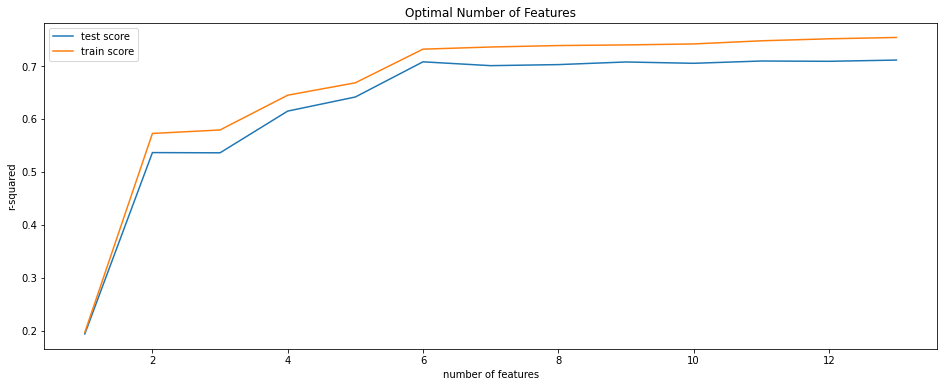

In [29]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')